In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<h1><center>CARS REGRESSION</center></h1>

Importing data
---

Data is comprised of 2 _features_:
1. km_driven : car mileage/ kilometers driven on differents cars
2. selling_price : selling prices.

In [13]:
cars = pd.read_csv("T1_cars.csv");cars.head()

,km_driven,selling_price
0,70000,60000
1,50000,135000
2,100000,600000
3,46000,250000
4,141000,450000


Exploratory Data Analisis (EDA)
---

### Pandas DataFrame dimensions.

There are 4340 rows and 2 columns.

In [25]:
cars.shape

(4340, 2)

### General information.

In [12]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0


### Missing values.

No NaN values in neither selling_price nor km_driven columns.

In [15]:
cars.isna().sum()

km_driven        0
selling_price    0
dtype: int64

### Columns types.

There is nothing to do concerning to data wrangling taking into account that all our data is perfectly structurated and has no NaN values.

In [30]:
cars.dtypes

km_driven        int64
selling_price    int64
dtype: object

### Value Counts : How frequent are values in each column?

In [32]:
cars.km_driven.value_counts()

70000     236
80000     228
50000     222
120000    220
60000     215
         ... 
80577       1
49834       1
19107       1
13270       1
22255       1
Name: km_driven, Length: 770, dtype: int64

In [33]:
cars.selling_price.value_counts()

300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
1331000      1
479000       1
1290000      1
746000       1
213000       1
Name: selling_price, Length: 445, dtype: int64

Data Visualization.
---

### km_driven distribution.
Positively Skewed and Positive kustosis (Leptokurtic). Long and heavy right tail. 

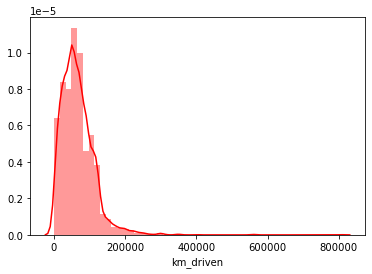

In [36]:
sns.distplot(cars.km_driven, color = "r")

### selling_price distribution.
Positively Skewed and Positive kustosis (Leptokurtic). Long and heavy right tail. 

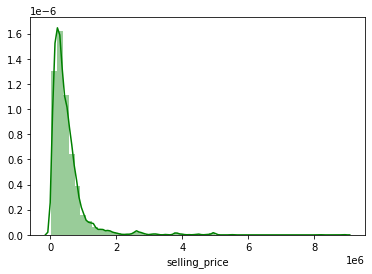

In [37]:
sns.distplot(cars.selling_price, color = "g")

### Pairplot : Plot-wise, is there exists any relation between both selling_price and km_driven columns?


At first glance, it seems there is not any sort of relation between both columns; foremost the one we are looking for (linear).

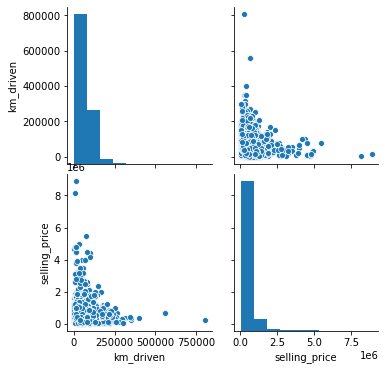

In [20]:
sns.pairplot(cars)

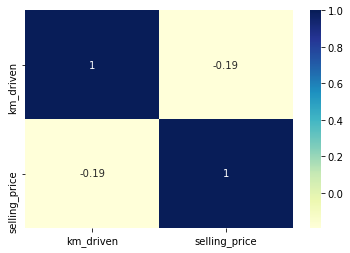

In [41]:
sns.heatmap(cars.corr(), annot = True,cmap="YlGnBu")

Spliting the data.
---

In [102]:
X = cars.iloc[:,0].values
Y = cars.iloc[:,1].values
X_train, x_test, Y_train, y_test = train_test_split(X,
                                                    Y,
                                                   test_size = .3,
                                                    random_state = 3)
X_train = X_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

Modeling.
---

In [103]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

### Test Data

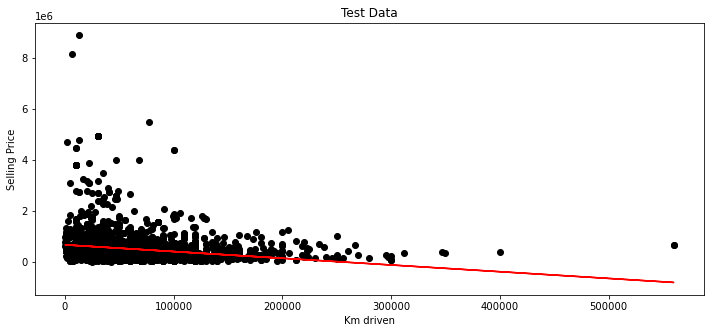

In [104]:
fig, ax = plt.subplots(figsize = [12,5])
plt.scatter(X_train, Y_train, color = 'black')
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Test Data')
plt.xlabel('Km driven')
plt.ylabel('Selling Price')
plt.show()

### Train Data : How well test data is displayed in the plot?

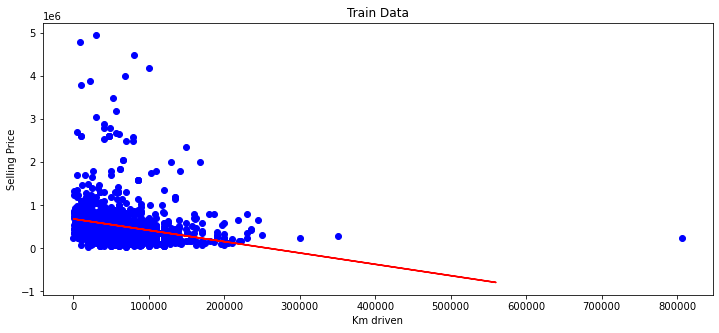

In [105]:
fig, ax = plt.subplots(figsize = [12,5])
plt.scatter(x_test, y_test, color = "blue")
plt.plot(X_train, lr.predict(X_train), color = "red")
plt.title('Train Data')
plt.xlabel('Km driven')
plt.ylabel('Selling Price')
plt.show()

Predictions.
---

In [108]:
Y_pred = lr.predict(x_test)
len(Y_pred)

1302

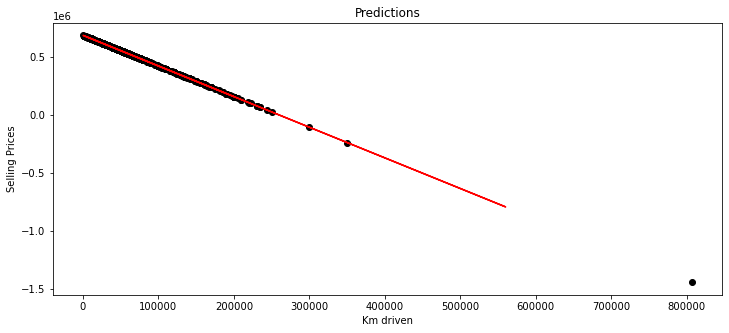

In [121]:
fig, ax = plt.subplots(figsize = [12,5])
plt.scatter(x_test, Y_pred, color = 'black')
plt.plot(X_train, lr.predict(X_train), color = 'red') #Recta correspondiente a los datos de entrenamiento
plt.title('Predictions')
plt.xlabel('Km driven')
plt.ylabel('Selling Prices')
plt.show()

### Coefficients

In [109]:
lr.coef_

array([-2.63605355])

### Interception

In [110]:
lr.intercept_

683515.5406700203

### Equation of the linear regression line.

According to Linear Regression, data is described as: __-2.63605355X + 683515.5406700203__

Evaluation.
---

### $R^2$

In [137]:
r2 = r2_score(y_test, Y_pred);round(r2,4)

0.0217

### Absolute Errors

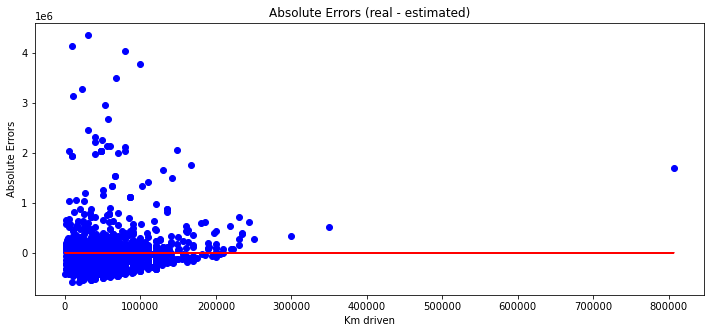

In [134]:
err_abs = y_test-Y_pred
fig, ax = plt.subplots(figsize = [12,5])
plt.scatter(x_test, err_abs, color = 'blue')
plt.plot(x_test, np.zeros(len(err_abs)), color = 'red') 
plt.title('Absolute Errors (real - estimated)')
plt.xlabel('Km driven')
plt.ylabel('Absolute Errors')
plt.show()

### Relative Errors

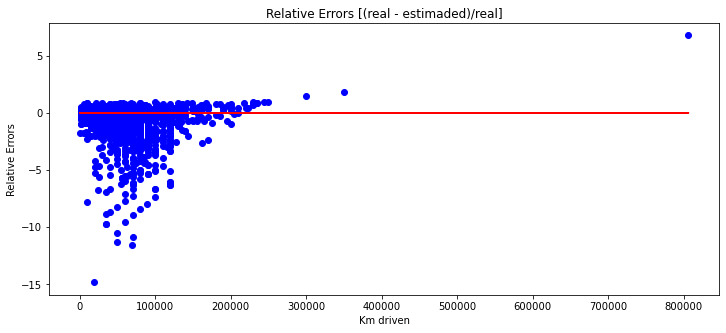

In [136]:
err_rel = err_abs/y_test
fig, ax = plt.subplots(figsize = [12,5])
plt.scatter(x_test, err_rel, color = 'blue')
plt.plot(x_test, np.zeros(len(err_abs)), color = 'red') #Recta en Y = 0
plt.title('Relative Errors [(real - estimaded)/real]')
plt.xlabel('Km driven')
plt.ylabel('Relative Errors')
plt.show()

### Real values vs Estimated values

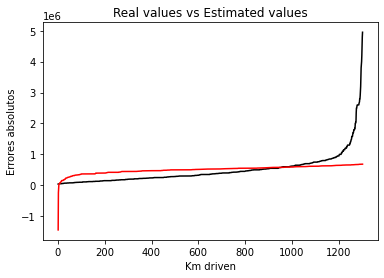

In [133]:
X = range(1,len(y_test)+1)
plt.plot(X, sorted(y_test), color = 'black') #Recta de valores reales
plt.plot(X, sorted(Y_pred), color = 'red') #Recta de valores estimados
plt.title('Real values vs Estimated values')
plt.xlabel('Km driven')
plt.ylabel('Errores absolutos')
plt.show()

Conclusions.
---

1. The is no use in trying to adjust a linear regression line for this particular dataset: $R^2$ is 0.0217 which means the model can explain .0217 of the variance of the dependent variable (Selling Price).
2. There is not a linear correlation between both _features_. As a matter of the fact, its Pearson's correlation is -0.19.
3. This model will lead to wrong predictions; for this particular case, Linear regression turns out to be utterly useful.

What if prior to fit the data I preprocess it by using StandardScaler?
---

In [138]:
from sklearn.preprocessing import StandardScaler

In [155]:
scaler = StandardScaler()
scaled = scaler.fit_transform(cars)
X_trans = scaled[:,0]
Y_trans = scaled[:,1]

In [163]:
X_train_trans, x_test_trans, Y_train_trans, y_test_trans = train_test_split(X_trans,
                                                    Y_trans,
                                                    test_size = .3,
                                                    random_state = 4)
X_train_trans = X_train_trans.reshape(-1,1)
x_test_trans = x_test_trans.reshape(-1,1)

In [157]:
lr_trans = LinearRegression()
lr_trans.fit(X_train_trans,Y_train_trans)

LinearRegression()

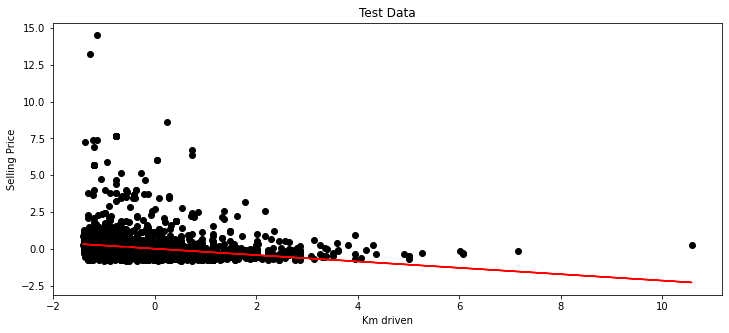

In [161]:
fig, ax = plt.subplots(figsize = [12,5])
plt.scatter(X_train_trans, Y_train_trans, color = 'black')
plt.plot(X_train_trans, lr_trans.predict(X_train_trans), color = 'red')
plt.title('Test Data')
plt.xlabel('Km driven')
plt.ylabel('Selling Price')
plt.show()

In [164]:
Y_pred_trans = lr_trans.predict(x_test_trans)
r2_trans = r2_score(y_test_trans, Y_pred_trans);round(r2_trans,4)

0.0249

Using StandarScaler does actually improve $R^2$. Nonethless, this improvement is roughtly .03 units. In other words, bad results have nothing to do with whether scaling the data or not. 